# Изменение расстояния до защитника
После серии попаданий игрок будет бросать более сложные броски (из-за опеки) или другие игроки почувствуют hot-hand и будут "плотнее" опекать игрока

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns # визуализация данных

In [23]:
shots = pd.read_csv('curry1415.csv', header=0)
# отсортируем данные для соблюдения временной последовательности
sorted_shots = shots.sort_values(['espn_game_id', 'period', 'minutes_remaining', 'seconds_remaining'], ascending=[1, 1, 0, 0])
# изменим индексацию данных, чтобы дальнейшем использовать в циклах
sorted_shots.index=range(len(sorted_shots))


In [24]:
# создадим новые колонки "после_промаха" и "после попадания"
sorted_shots['previous'] = np.zeros(len(shots)) 
sorted_shots['deff_dist'] = np.zeros(len(shots)) 

for i,row in enumerate(sorted_shots[1:].iterrows()):
    if i>0:
        if sorted_shots.loc[i,'espn_game_id'] == sorted_shots.loc[i-1,'espn_game_id']:
            sorted_shots.loc[i,'previous'] = sorted_shots.loc[i-1,'shot_made_flag']
            sorted_shots.loc[i,'deff_dist'] = sorted_shots.loc[i,'defender_distance'] - sorted_shots.loc[i-1,'defender_distance']

In [25]:
# разобьем данные на две части: после промазанного и после попадания
after_made = sorted_shots[sorted_shots.previous == 1]
after_miss = sorted_shots[sorted_shots.previous == 0]

# Построим CDF для "после промаха" и "после попадания" 
bins = np.arange(-10,10,0.5)
x = after_made.deff_dist
y = after_miss.deff_dist
h1 = np.histogram(after_made.deff_dist,bins)
h2 = np.histogram(after_miss.deff_dist,bins)
hist_1 = np.true_divide(h1[0],sum(h1[0]))
hist_2 = np.true_divide(h2[0],sum(h2[0]))
cumu_1 = []
cumu_1.append(0)
cumu_2 = []
cumu_2.append(0)

for i,item in enumerate(hist_1):
    if i>0:
        cumu_1.append(cumu_1[i-1] + hist_1[i])
        cumu_2.append(cumu_2[i-1] + hist_2[i])
        
        
plt.plot(bins[1:]*0.3,cumu_1)
plt.plot(bins[1:]*0.3,cumu_2)
plt.legend(['After made','After miss'], loc = 2)
plt.xlabel('Difference from previous shot [m]')
plt.ylabel('Cumulative Density Function')

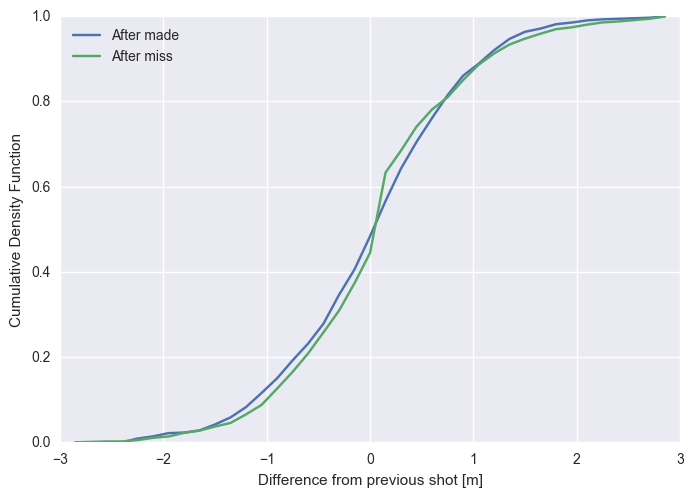

In [8]:
plt.show()

Этот график не несет за собой полезной информации, так как для разных типов бросков разное среднее расстояние до соперника. При броске из-под кольца расстоние 0, а при jump shot-е -- >0.
Нужно посмотреть разницу расстояний между джамп шотами.